In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
from tabulate import tabulate

In [2]:
bird_labels = {'head':1, 'leye':2, 'reye':3, 'beak':4, 'torso':5, 'neck':6, 'lwing':7, 'rwing':8, 'lleg':9, 'lfoot':10, 'rleg':11, 'rfoot':12, 'tail':13}

cat_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'nose':6, 'torso':7, 'neck':8, 'lfleg':9, 'lfpa':10, 'rfleg':11, 'rfpa':12, 'lbleg':13, 'lbpa':14, 'rbleg':15, 'rbpa':16, 'tail':17}

cow_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'muzzle':6, 'lhorn':7, 'rhorn':8, 'torso':9, 'neck':10, 'lfuleg':11, 'lflleg':12, 'rfuleg':13, 'rflleg':14, 'lbuleg':15, 'lblleg':16, 'rbuleg':17, 'rblleg':18, 'tail':19}

dog_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'nose':6, 'torso':7, 'neck':8, 'lfleg':9, 'lfpa':10, 'rfleg':11, 'rfpa':12, 'lbleg':13, 'lbpa':14, 'rbleg':15, 'rbpa':16, 'tail':17, 'muzzle':18}

horse_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'muzzle':6, 'lfho':7, 'rfho':8, 'torso':9, 'neck':10, 'lfuleg':11, 'lflleg':12, 'rfuleg':13, 'rflleg':14, 'lbuleg':15, 'lblleg':16, 'rbuleg':17, 'rblleg':18, 'tail':19, 'lbho':20, 'rbho':21}

bottle_labels = {'cap':1, 'body':2}

person_labels = {'head':1, 'leye':2,  'reye':3, 'lear':4, 'rear':5, 'lebrow':6, 'rebrow':7,  'nose':8,  'mouth':9,  'hair':10, 'torso':11, 'neck': 12, 'llarm': 13, 'luarm': 14, 'lhand': 15, 'rlarm':16, 'ruarm':17, 'rhand': 18, 'llleg': 19, 'luleg':20, 'lfoot':21, 'rlleg':22, 'ruleg':23, 'rfoot':24}

bus_labels = { 'frontside':1, 'leftside':2, 'rightside':3, 'backside':4, 'roofside':5, 'leftmirror':6, 'rightmirror':7, 'fliplate':8, 'bliplate':9  }
for ii in range(0,10):
    bus_labels['door_{}'.format(ii+1)] = 10+ii
for ii in range(0,10):
    bus_labels['wheel_{}'.format(ii+1)] = 20+ii
for ii in range(0,10):
    bus_labels['headlight_{}'.format(ii+1)] = 30+ii
for ii in range(0,20):
    bus_labels['window_{}'.format(ii+1)] = 40+ii
    
car_labels = { 'frontside':1, 'leftside':2, 'rightside':3, 'backside':4, 'roofside':5, 'leftmirror':6, 'rightmirror':7, 'fliplate':8, 'bliplate':9  }
for ii in range(0,3):
    car_labels['door_{}'.format(ii+1)] = 10+ii
for ii in range(0,4):
    car_labels['wheel_{}'.format(ii+1)] = 13+ii
for ii in range(0,6):
    car_labels['headlight_{}'.format(ii+1)] = 17+ii
for ii in range(0,7):
    car_labels['window_{}'.format(ii+1)] = 23+ii

aeroplane_labels = {'body': 1, 'stern': 2, 'lwing': 3, 'rwing':4, 'tail':5}
for ii in range(0, 10):
    aeroplane_labels['engine_{}'.format(ii+1)] = 6+ii
for ii in range(0, 10):
    aeroplane_labels['wheel_{}'.format(ii+1)] = 16+ii


motorbike_labels = {'fwheel': 1, 'bwheel': 2, 'handlebar': 3, 'saddle': 4}
for ii in range(0,10):
    motorbike_labels['headlight_{}'.format(ii+1)] = 5+ii

bicycle_labels = {'fwheel': 1, 'bwheel': 2, 'saddle': 3, 'handlebar': 4, 'chainwheel': 5}
for ii in range(0,10):
    bicycle_labels['headlight_{}'.format(ii+1)] = 6+ii


train_labels = {'head':1,'hfrontside':2,'hleftside':3,'hrightside':4,'hbackside':5,'hroofside':6}
for ii in  range(0,10):
    train_labels['headlight_{}'.format(ii+1)] = 7 + ii
for ii in  range(0,10):
    train_labels['coach_{}'.format(ii+1)] = 17 + ii
for ii in  range(0,10):
    train_labels['cfrontside_{}'.format(ii+1)] = 27 + ii
for ii in  range(0,10):
    train_labels['cleftside_{}'.format(ii+1)] = 37 + ii
for ii in  range(0,10):
    train_labels['crightside_{}'.format(ii+1)] = 47 + ii
for ii in  range(0,10):
    train_labels['cbackside_{}'.format(ii+1)] = 57 + ii
for ii in  range(0,10):
    train_labels['croofside_{}'.format(ii+1)] = 67 + ii

sheep_labels = cow_labels

part_labels = {'bird': bird_labels, 'cat': cat_labels, 'cow': cow_labels, 'dog': dog_labels, 'sheep': sheep_labels, 'horse':horse_labels, 'car':car_labels, 'bus':bus_labels, 'bicycle':bicycle_labels, 'motorbike':motorbike_labels, 'person':person_labels,'aeroplane':aeroplane_labels, 'train':train_labels}

In [3]:
def plot_part_label_occurence(label, object_name):

    unique_part_list = [True]*len(label)

    index = 0
    for ii in label:
        for ind, jj in enumerate(label):
            if (ii==jj).all() and unique_part_list[ind]:
                unique_part_list[ind] = index
        index+=1

    data = unique_part_list 

    bins = [i for i in range(1,len(unique_part_list)+1)]

    plt.figure(figsize=(20,5))
    plt.hist(unique_part_list, bins=bins)
    plt.title(object_name+ ' '+ 'Histogram of # images for each unique part list')
    plt.xlabel('id of unique labels')
    plt.ylabel('number of instances')

    plt.show()
    return len(set(unique_part_list))
    
def CountFrequency(data_list, index_list): 
    freq = {} 
    for item in data_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items():
        index_list[key]  = value
    
    return index_list

def plot_number_of_parts(info, object_name):
    
    data = info['num_parts'] 

    index_list = [0]*(info['max_parts']+1)
    data = CountFrequency(data,index_list)

    xint = range(0, info['max_parts']+1)
    #plt.xticks(xint)
    plt.figure(figsize=(10,5))
    plt.bar(range(0,info['max_parts']+1), data)

    plt.title(object_name+ ' '+ 'Histogram of # images wrt their part counts')
    plt.xlabel('number of parts')
    plt.ylabel('number of instances')

    plt.show()
    
def scatter_x_y(info, object_name):
    plt.scatter([i[0] for i in info['size']], [i[1] for i in info['size']])
    plt.title(object_name+ ' '+ 'scatter plot for coordinates')
    plt.xlabel('x-coord')
    plt.ylabel('y-coord')
    plt.show()
    
def plot_part_occurence(info, object_name, label):
    list_s = [0]*info['max_parts'] 
    for lbl in label:
        for i in np.where(lbl==1)[0]:
            list_s[i]+=1 

    data = list_s 
    xint = range(0, info['max_parts'])
    plt.figure(figsize=(10,5))
    plt.xticks(xint, rotation='vertical')
    plt.bar([i for i in part_labels[object_name]], list_s)
    plt.title(object_name+ ' '+ 'Histogram of part occurrences')
    plt.xlabel('part name')
    plt.ylabel('number of instances')
    plt.show()

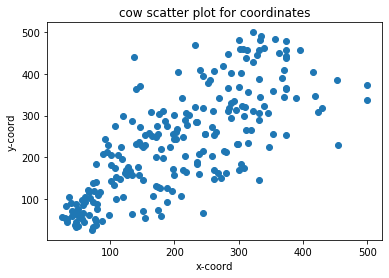

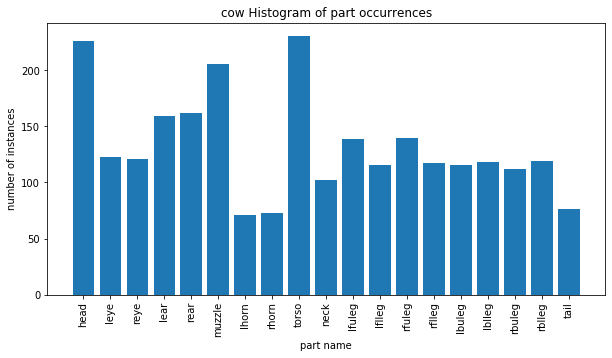

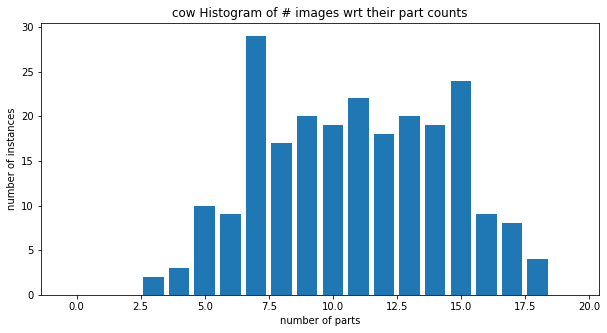

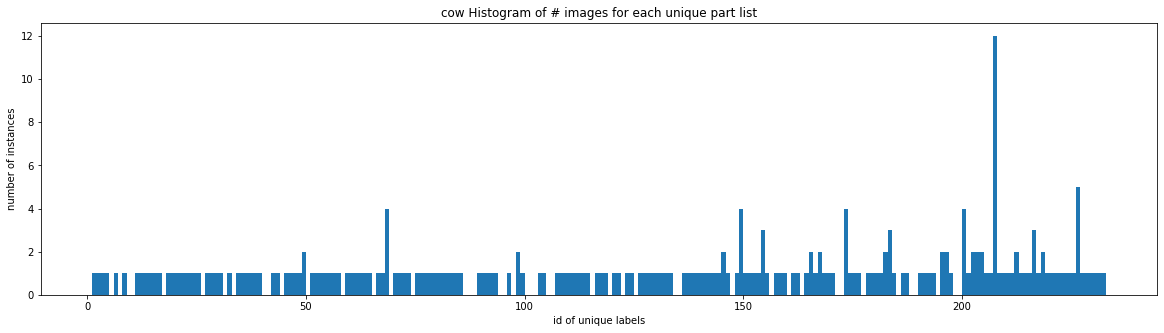

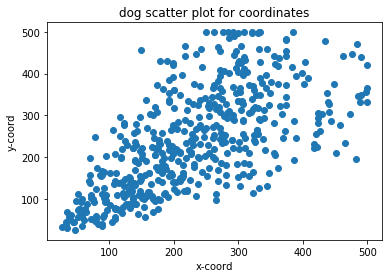

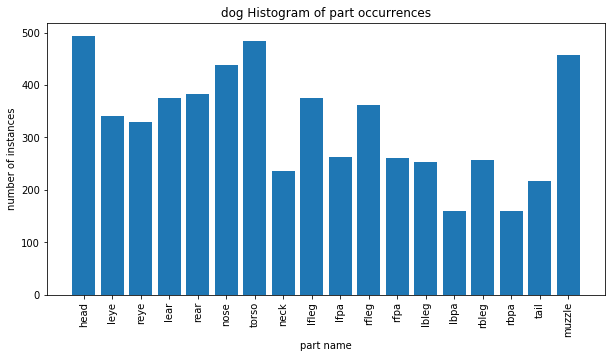

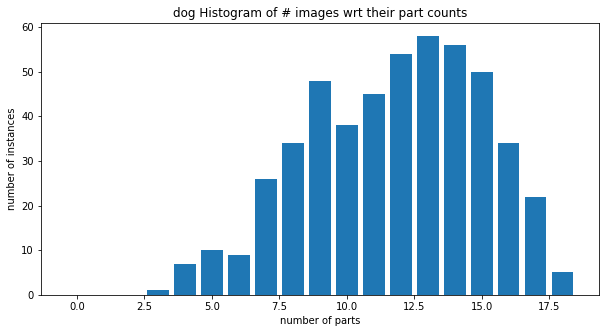

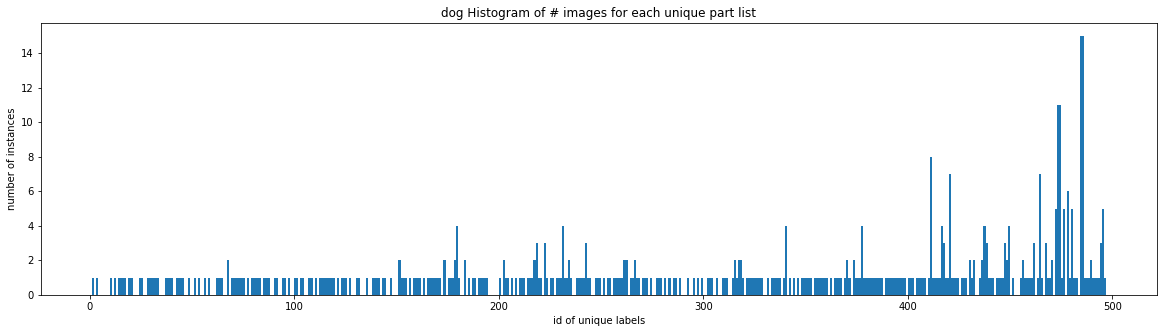

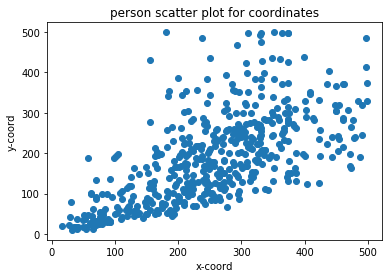

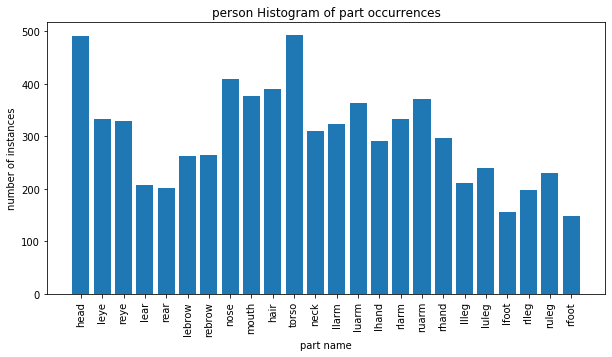

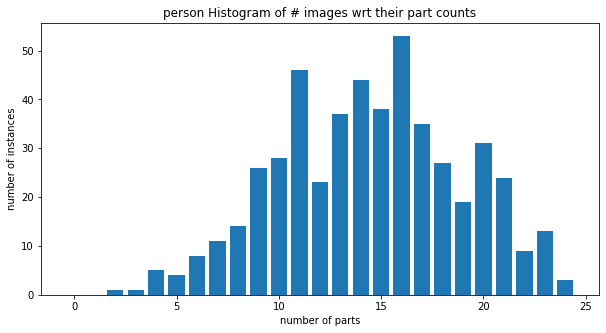

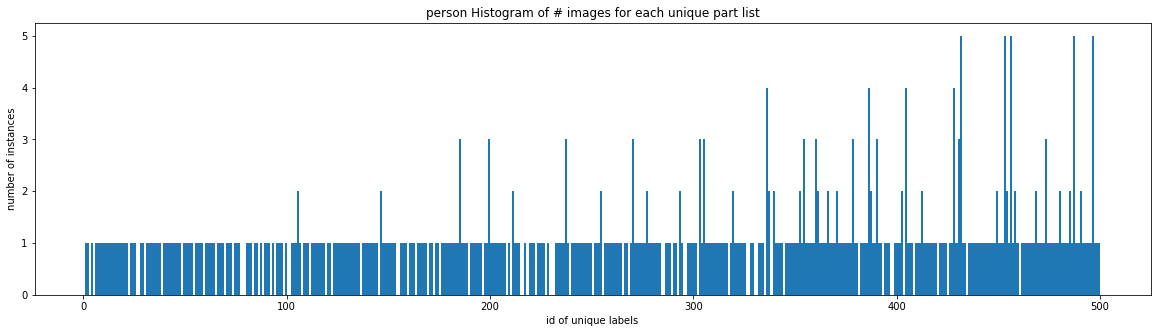

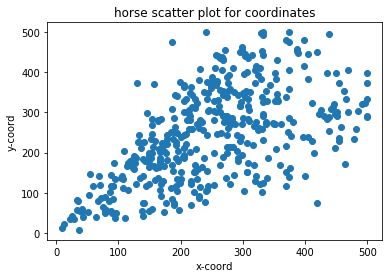

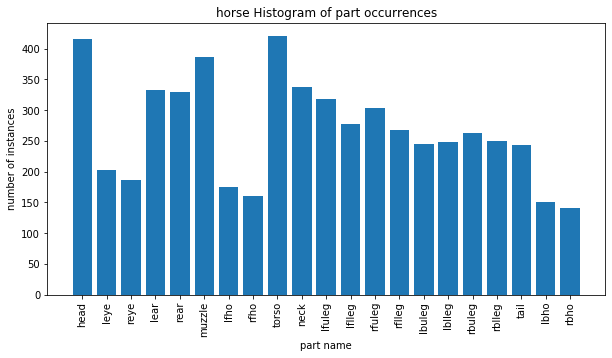

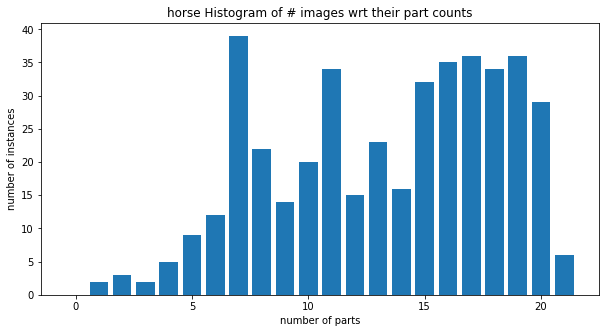

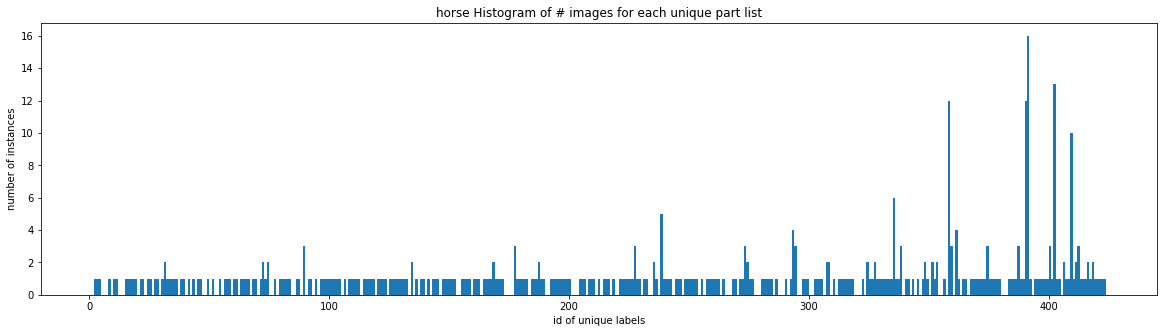

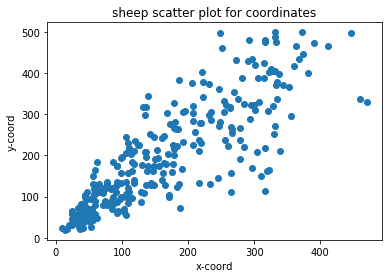

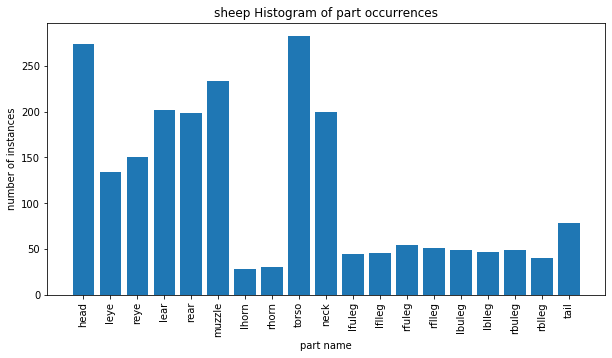

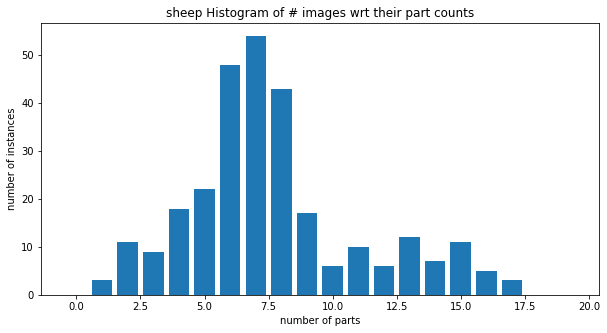

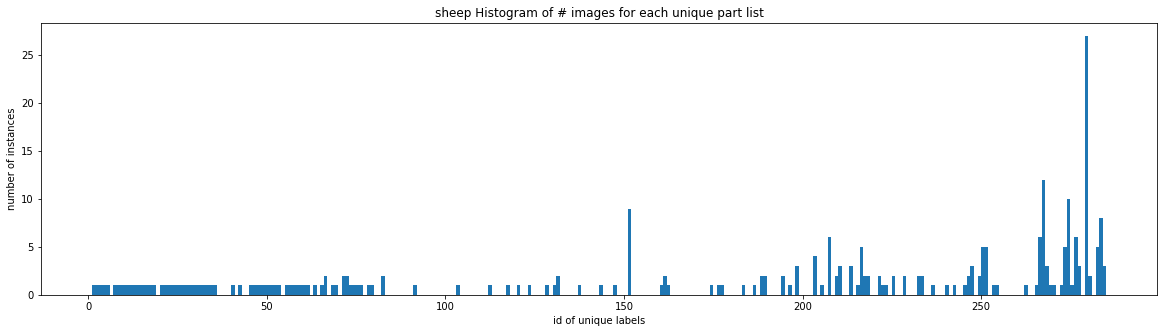

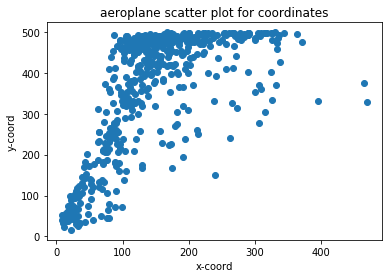

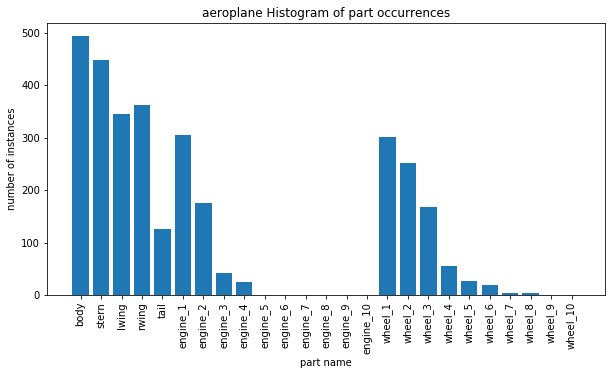

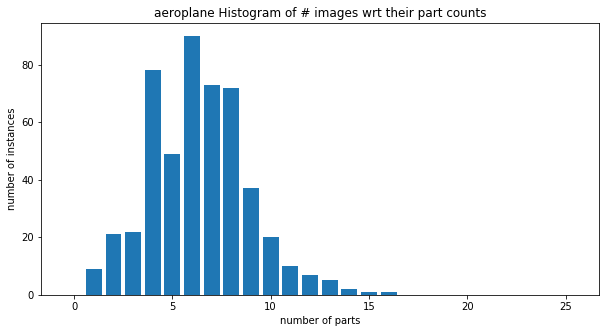

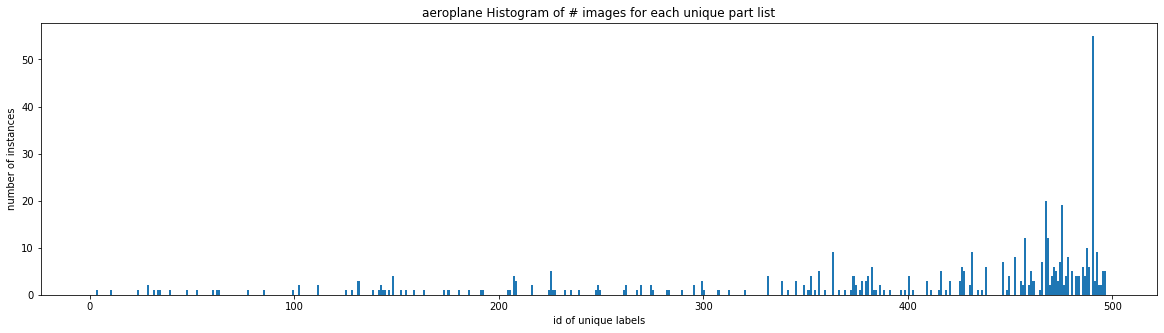

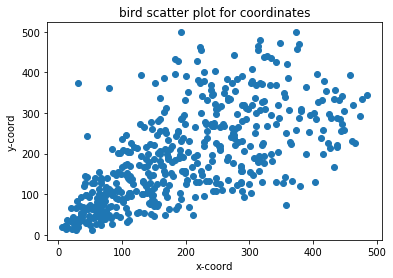

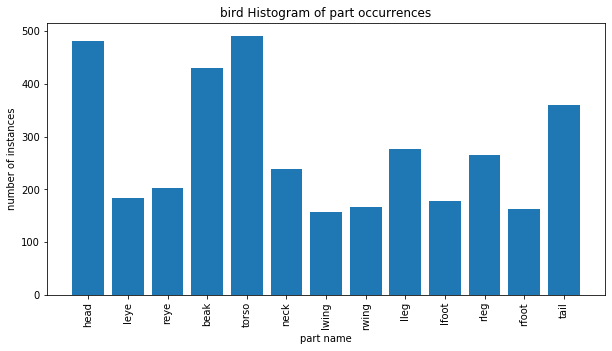

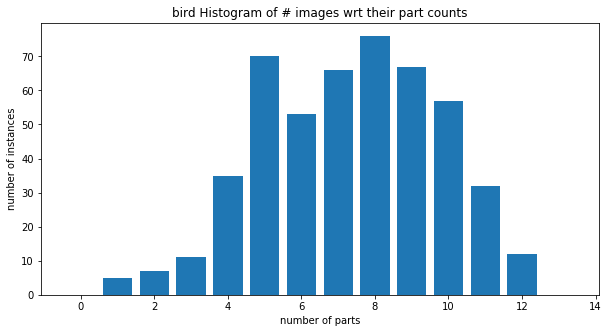

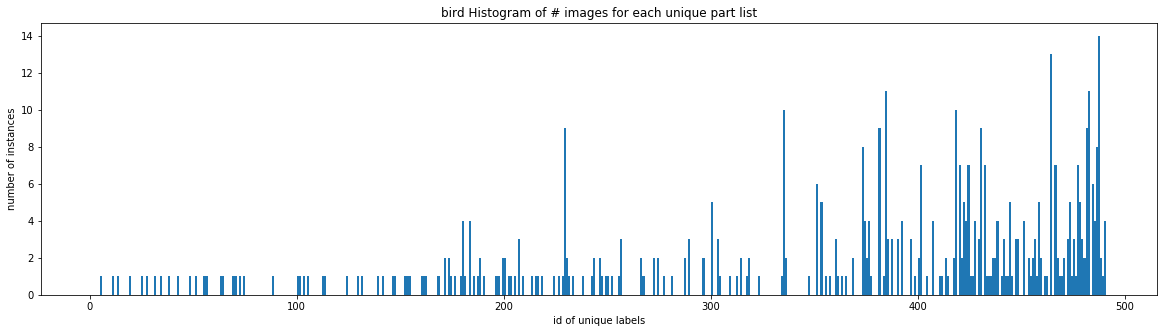

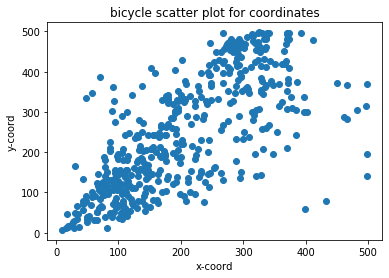

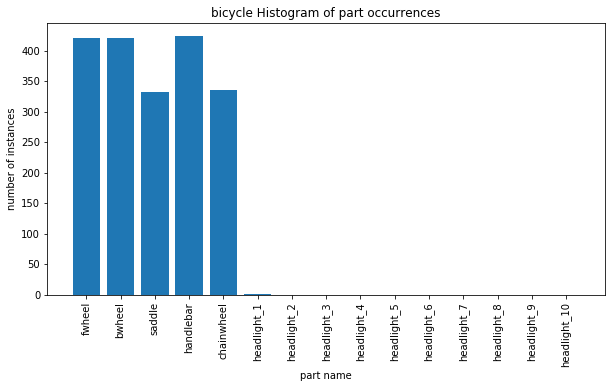

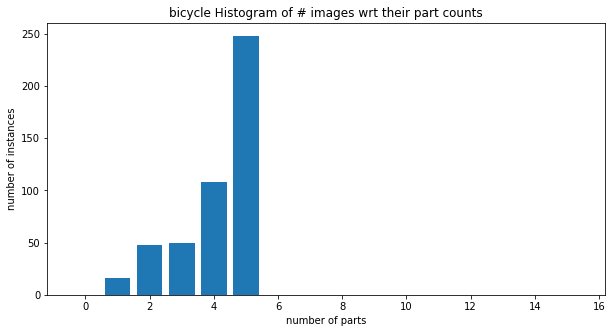

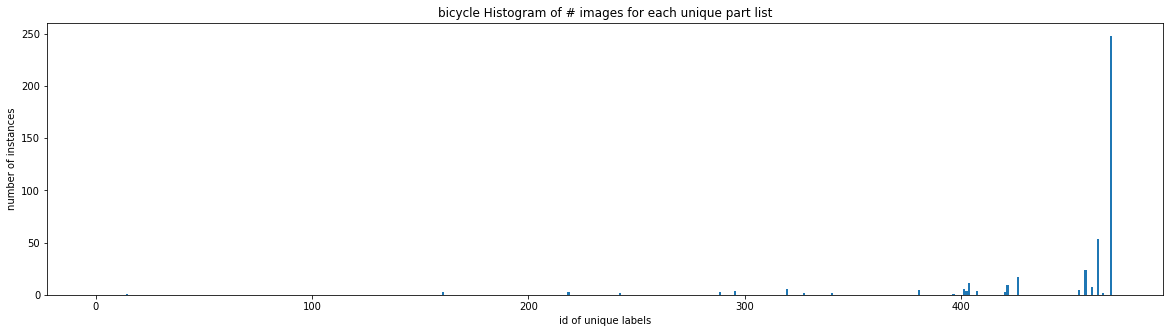

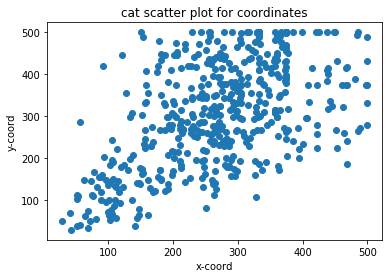

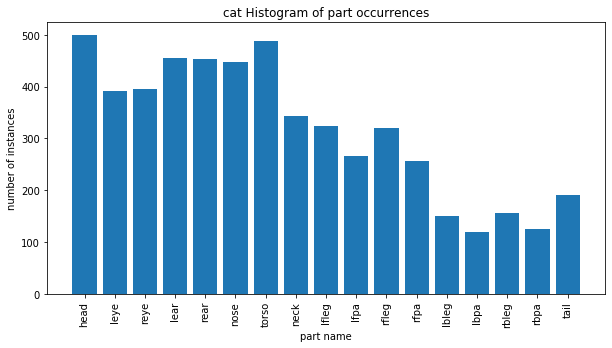

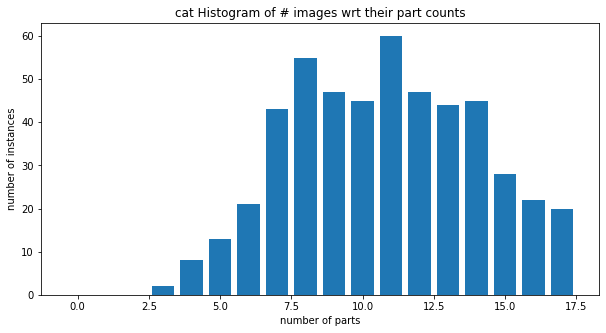

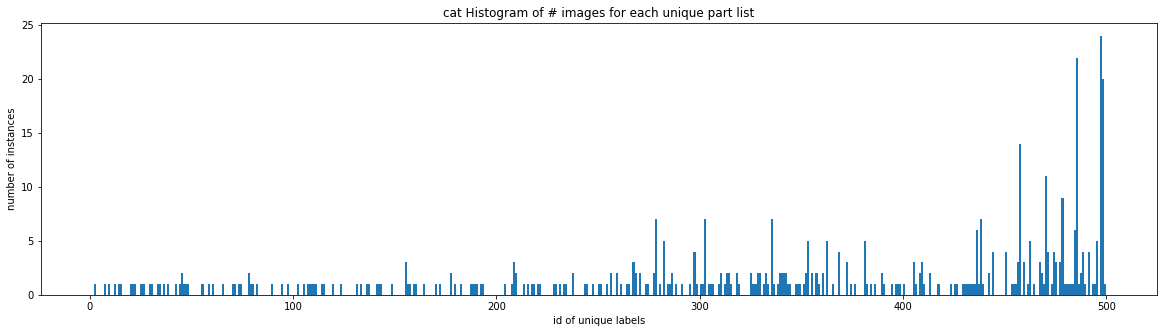

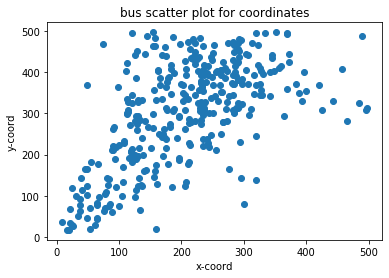

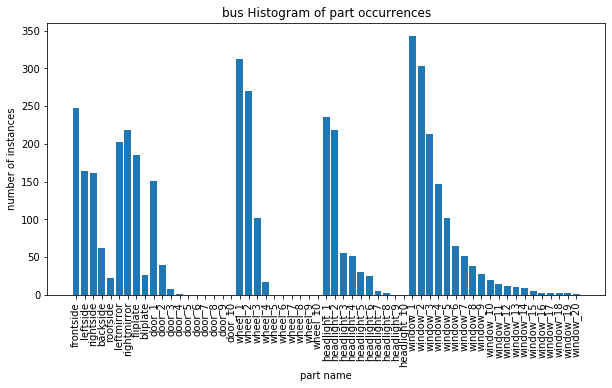

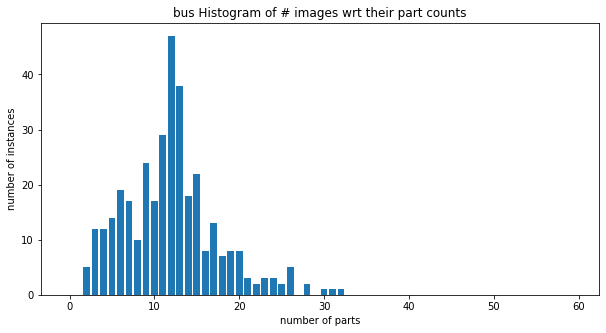

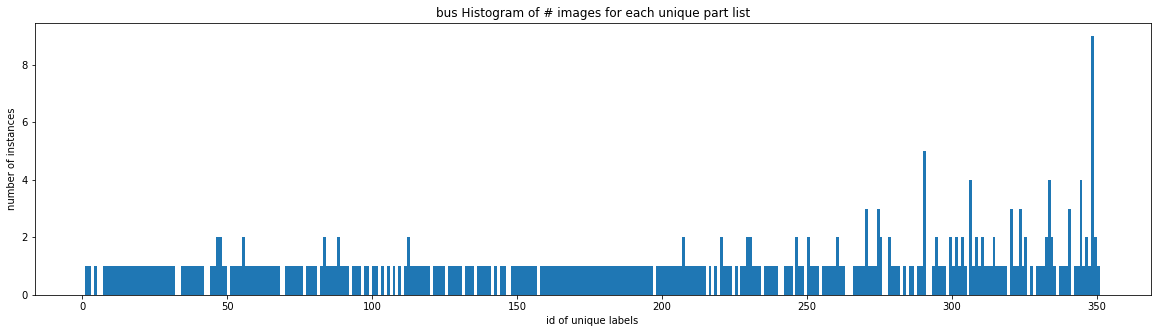

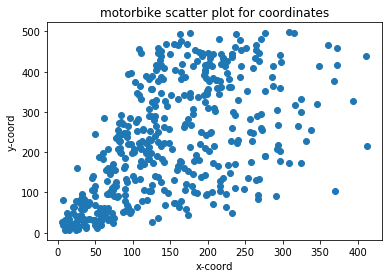

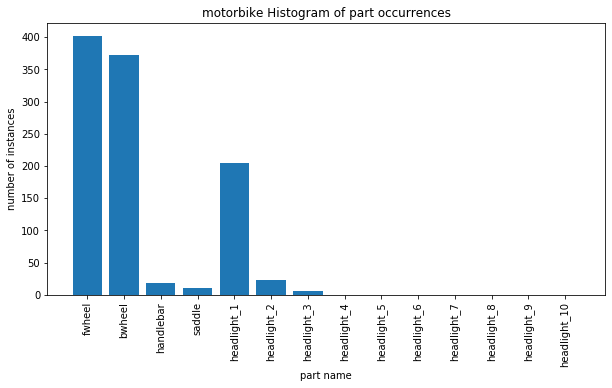

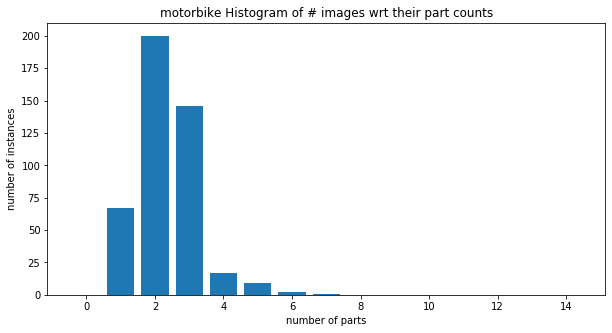

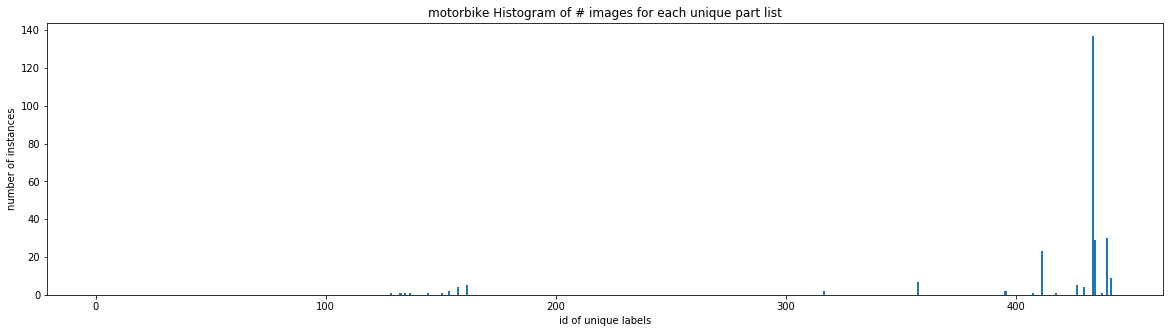

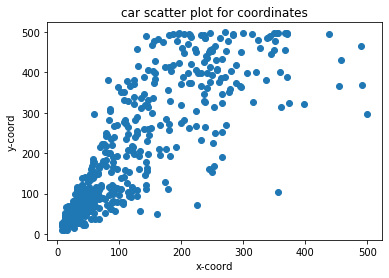

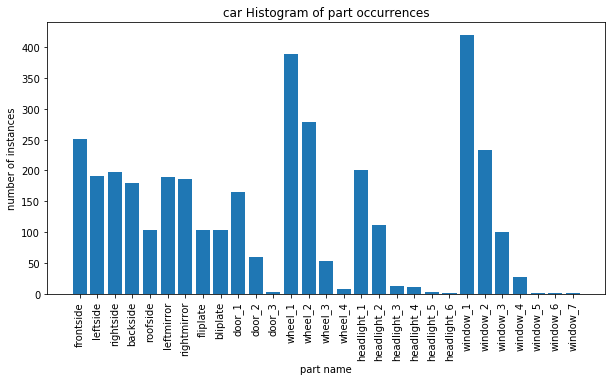

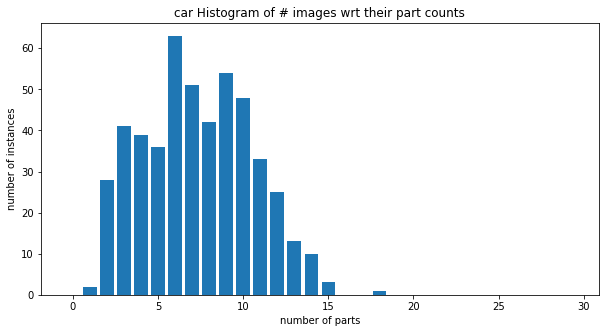

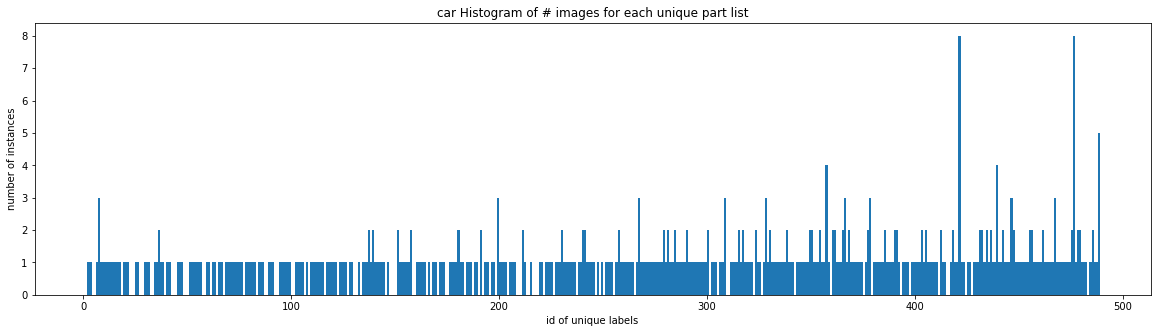

Object category      # of images    Max # of parts    # of unique part lists
-----------------  -------------  ----------------  ------------------------
cow                          233                19                       187
dog                          497                18                       347
person                       500                24                       421
horse                        424                21                       310
sheep                        285                19                       138
aeroplane                    497                25                       151
bird                         491                13                       198
bicycle                      470                15                        25
cat                          500                17                       238
bus                          351                59                       293
motorbike                    442                14                        23

In [4]:
objects = ['cow', 'dog', 'person', 'horse',  'sheep', 'aeroplane', 'bird', 'bicycle',  'cat', 'bus', 'motorbike', 'car']

number_of_images = []
max_number_of_parts = []
number_of_unique_partlists = []
for object_name in objects:

    with open(object_name +  '_part_separated_labels', 'rb') as f:
        label = pickle.load(f)

    with open(object_name +  '_info', 'rb') as f:
        info = pickle.load(f)
    scatter_x_y(info, object_name)
    plot_part_occurence(info, object_name, label)
    plot_number_of_parts(info, object_name)
    unique_partlists = plot_part_label_occurence(label, object_name)
    
    number_of_images.append(len(label))
    max_number_of_parts.append(info['max_parts'])
    number_of_unique_partlists.append(unique_partlists)
    
results = [ (i,j,k,l) for i,j,k,l in zip(objects,number_of_images,max_number_of_parts,number_of_unique_partlists)]

print(tabulate(results, headers=["Object category","# of images","Max # of parts","# of unique part lists"]))